# Erzeugen von Zufallszahlen

## Normalverteilte Zufallszahlen

In [1]:
import numpy

In [2]:
!pip install numpy

In [3]:
numpy.random.seed( 42 )

In [4]:
A = numpy.random.normal( loc = 0.0, scale = 1.0, size = 10000 )

In [5]:
A

array([ 0.49671415, -0.1382643 ,  0.64768854, ..., -0.70531672,
        0.49576557,  0.64438845])

In [6]:
A.min()

-3.9224002516183423

In [7]:
A.max()

3.9262377064363267

In [8]:
A.shape

(10000,)

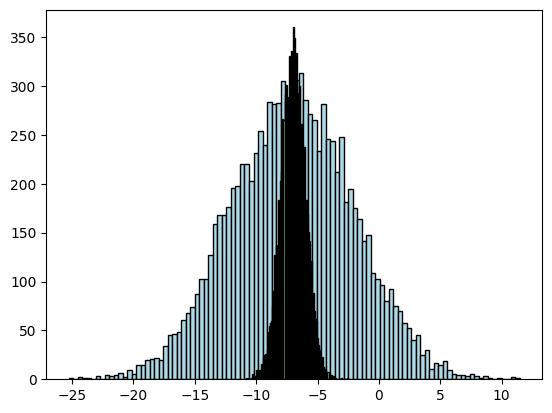

In [9]:
A = numpy.random.normal( loc = -7.0, scale = 1.0, size = 10000 )
B = numpy.random.normal( loc = -7.0, scale = 5.0, size = 10000 )

import matplotlib.pyplot as plt
plt.hist(B, bins=100, color="lightblue",  edgecolor="black")
plt.hist(A, bins=100, color="lightgreen", edgecolor="black")
plt.show()

In [10]:
A[:5]

array([-7.67849473, -7.30549946, -7.59738106, -6.88958195, -5.80282147])

## Gleichverteilte Zufallszahlen

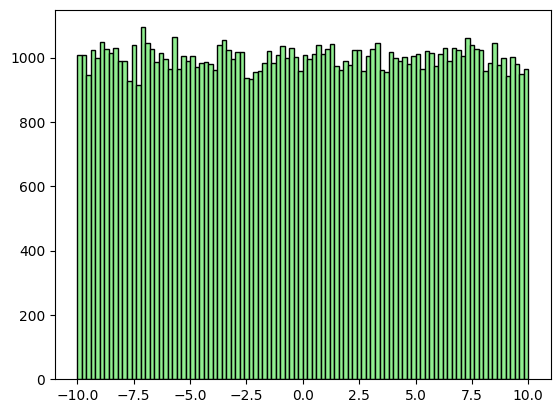

In [11]:
C = numpy.random.uniform(low = -10, high = +10, size = 100000)

import matplotlib.pyplot as plt
plt.hist(C, bins=100, color="lightgreen", edgecolor="black")
plt.show()

# Simulation eines Abstandssensors mit linearer Kennlinie

In [20]:
numpy.random.seed( 42 )

class absstandssensor_lineare_kennlinie:

    def __init__(self):
        self.bias = numpy.random.uniform(low=-10, high=+10)
        self.noise = numpy.random.uniform(low=1, high=5)

    def sample(self, abstand):
        sensorwert = abstand + numpy.random.normal(loc=self.bias,
                                                   scale=self.noise)
        return sensorwert

    def kennlinie(self):
        abstaende   = []
        sensorwerte = []
        for abstand in range(0,101):
            sensorwert = self.sample( abstand )
            abstaende.append( abstand )
            sensorwerte.append( sensorwert )

        return numpy.array( abstaende ), numpy.array( sensorwerte )

    def zeige_kennlinie(self):
        a,s = self.kennlinie()
        plt.plot(a,s)
        plt.xlabel("Tatsächlicher Abstand (Ground Truth) [cm]")
        plt.ylabel("Sensorwert")
        plt.show()


a1 = absstandssensor_lineare_kennlinie()

In [21]:
a1.bias

-2.50919762305275

In [23]:
a1.noise

4.802857225639665

In [30]:
a1.sample(10)

5.235983930206821

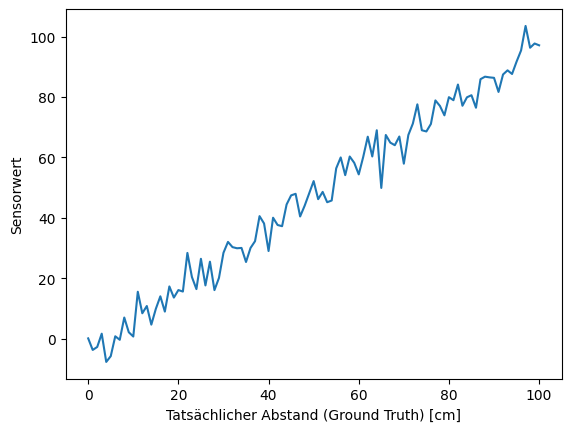

In [31]:
a1.zeige_kennlinie()

In [32]:
a1.kennlinie()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([-11.72478182,  -1.63653998,  -0.21992052,  12.32140256,
          0.56692013,   3.93909121,   3.3240867 ,  -1.12219138,
         10.97961719,  10.10222938,  11.29001588,   4.12314427,
         16.22822317,   3.75791187,  14.30939321,  23.01124801,
          8.73339783,  11.77095523,  15.96941366,  14.07268069,
         10.04318731,  18.82010056,  14.38870931,  22.7653992 ,
         17.07493905,  29.93491603,  19.72894

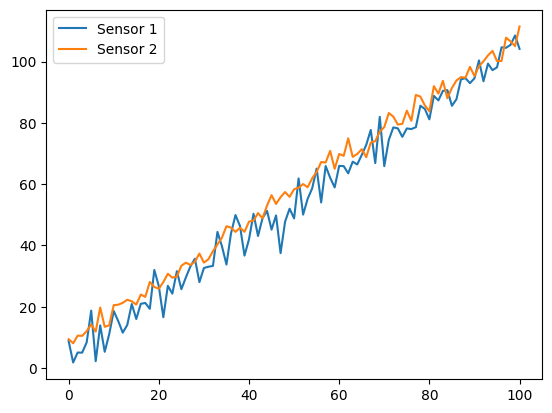

In [33]:
s1 = absstandssensor_lineare_kennlinie()
s2 = absstandssensor_lineare_kennlinie()

a1,sw1 = s1.kennlinie()
a2,sw2 = s2.kennlinie()
plt.plot(a1,sw1, label = "Sensor 1")
plt.plot(a2,sw2, label = "Sensor 2")
plt.legend()
plt.show()

In [34]:
s1.bias

4.039337545154067

In [35]:
s2.bias

7.8001068363513255

In [36]:
s1.noise

4.183170677744404

In [37]:
s2.noise

2.351980627406143

# Fehlerfunktion für Fusionsergebnisse

In [38]:
gt          = numpy.array( [1,   2,   3,   4,   5]   )
sensorwerte = numpy.array( [0.5, 2.5, 2.5, 4.5, 5.5] ) 

In [39]:
type(gt)

numpy.ndarray

In [40]:
type(sensorwerte)

numpy.ndarray

In [41]:
# Mean Absolute Error (MAE)
numpy.mean(abs(gt - sensorwerte))

0.5

In [42]:
def MAE_metrics(gt, sensorwerte):
    MAE = numpy.mean(abs(gt - sensorwerte))
    return MAE

In [43]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error( a1, sw1 )

4.865020236491162

In [44]:
MAE_metrics( a1, sw1 )

4.865020236491162

# Erster Versuch eines Fusionsansatzes (Mittelwertbildung)

## Fehler bei Verwendung nur eines Sensors

In [61]:
s1 = absstandssensor_lineare_kennlinie()
s2 = absstandssensor_lineare_kennlinie()

s1.bias = +3.1
s2.bias = +4.2

a1,sw1 = s1.kennlinie()
a2,sw2 = s2.kennlinie()

In [62]:
MAE_metrics(a1, sw1)

3.4726794772316327

In [63]:
MAE_metrics(a2, sw2)

4.360467913306137

## Sensordatenfusion über einfache Mittelwertbildung

In [64]:
sw_fusioniert = (sw1 + sw2) / 2
sw_fusioniert[:5]

array([1.71718594, 1.56349791, 5.56924355, 6.08554778, 6.72156452])

In [65]:
MAE_metrics(a1, sw_fusioniert)

3.899528690823572

In [66]:
s1.bias

3.1

In [67]:
s2.bias

4.2

## Experimentelle Bestimmung der Biase

In [95]:
# 1. Erzeuge Sensoren
s1 = absstandssensor_lineare_kennlinie()
s2 = absstandssensor_lineare_kennlinie()

# 2. Wie gut sind die Sensoren alleine?
print("Sensor1 alleine: ", MAE_metrics(a1, sw1))
print("Sensor2 alleine: ", MAE_metrics(a1, sw2))

# 3. Bestimme die Biase der beiden Sensoren experimentell
a1, sw1 = s1.kennlinie()
bias1 = numpy.mean(a1-sw1)
a2, sw2 = s2.kennlinie()
bias2 = numpy.mean(a2-sw2)

# 4. Sensordatenfusion nun mit Bias-Korrektur!
sw1 = sw1 + bias1
sw2 = sw2 + bias2
sw_fusioniert = (sw1 + sw2) / 2
print("Sensor1+2 mit Bias Korrektur: ", MAE_metrics(a1, sw_fusioniert))

Sensor1 alleine:  0.7888071867729773
Sensor2 alleine:  2.3070729682726667
Sensor1+2 mit Bias Korrektur:  1.0610703096200091


In [98]:
s1.bias

-3.4749216391770643

In [99]:
s2.bias

-5.349880155843376

In [100]:
bias1

3.798176858893879

In [101]:
bias2

5.243400995420215

# Experiment: Immer mehr Sensoren

In [107]:
class A:

    def __init__(self):
        A.v1 = 42
        A.v2 = "Hallo"

In [108]:
a1 = A()

In [109]:
a1.v1

42

In [110]:
a1.v2

'Hallo'

In [111]:
a1.v3 = "Fehlermeldung: Festplatte voll!"

In [141]:
def exp(anz_sensoren):

    # 1. Erzeugen der gewünschten Anzahl von Sensoren
    alle_sensoren = []
    for sid in range(anz_sensoren):
        s = absstandssensor_lineare_kennlinie()
        alle_sensoren.append( s )

    # 2. Für jeden Sensor experimentell den Biaskorrekturwert bestimmen
    for sensor in alle_sensoren:
        a,sw = sensor.kennlinie()
        bias = numpy.mean(a-sw)
        sensor.bias_korrekturwert = bias   

    # 3. Simuliere Messungen
    alle_messungen = []
    gt = None
    for sensor in alle_sensoren:
        a,sw = sensor.kennlinie()
        sw = sw + sensor.bias_korrekturwert
        alle_messungen.append( sw )
        if gt is None:
            gt = a

    # 4. Sensordatenfusion
    N = len(alle_messungen[0])
    summe = numpy.zeros(N)
    for messung in alle_messungen:
        summe = summe + messung
    fusionierte_sw = summe / anz_sensoren

    # 5. Wie gut ist die Fusion?
    MAE = MAE_metrics(gt, fusionierte_sw)
    return MAE

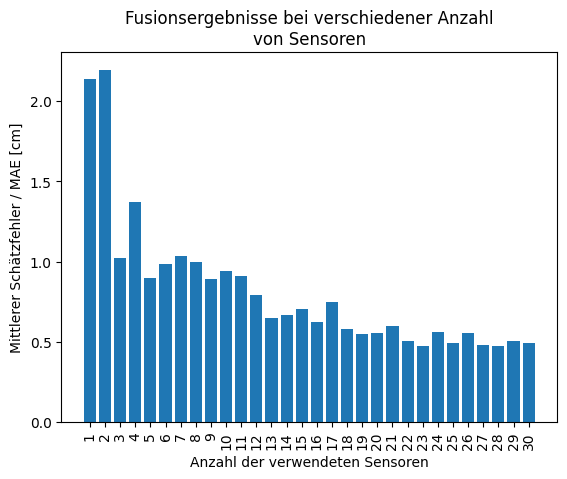

In [152]:
alle_MAEs = []
sensoranzahlen = []
for anz_sensoren in range(1,31):
    MAE = exp(anz_sensoren)
    alle_MAEs.append( MAE )
    sensoranzahlen.append( anz_sensoren )

import matplotlib.pyplot as plt
plt.bar( sensoranzahlen, alle_MAEs)
plt.xlabel("Anzahl der verwendeten Sensoren")
plt.ylabel("Mittlerer Schätzfehler / MAE [cm]")
plt.xticks( sensoranzahlen, rotation=90 )
plt.title("Fusionsergebnisse bei verschiedener Anzahl\nvon Sensoren")
plt.show()

# Simulation eines Sensors mit nicht-linearer Kennlinie

In [75]:
import numpy
import matplotlib.pyplot as plt

numpy.random.seed( 42 )

class absstandssensor_nichtlineare_kennlinie:

    def __init__(self):
        self.bias = numpy.random.uniform(low=-10, high=+10)
        self.noise = numpy.random.uniform(low=1, high=5)

    def sample(self, abstand):
        sensorwert = numpy.log(1+abstand)*10 + numpy.random.normal(loc=self.bias,
                                                                scale=self.noise)
        return sensorwert

    def kennlinie(self):
        abstaende   = []
        sensorwerte = []
        for abstand in range(0,101):
            sensorwert = self.sample( abstand )
            abstaende.append( abstand )
            sensorwerte.append( sensorwert )

        return numpy.array( abstaende ), numpy.array( sensorwerte )

    def zeige_kennlinie(self):
        a,s = self.kennlinie()
        plt.plot(a,s)
        plt.xlabel("Tatsächlicher Abstand (Ground Truth) [cm]")
        plt.ylabel("Sensorwert")
        plt.show()

    def __str__(self):
        return f"Bias: {self.bias:.2f}\nNoise: {self.noise:.2f}"
    


a1 = absstandssensor_nichtlineare_kennlinie()
a2 = absstandssensor_nichtlineare_kennlinie()

In [76]:
print(a1), print(a2)

Bias: -2.51
Noise: 4.80
Bias: 4.64
Noise: 3.39


(None, None)

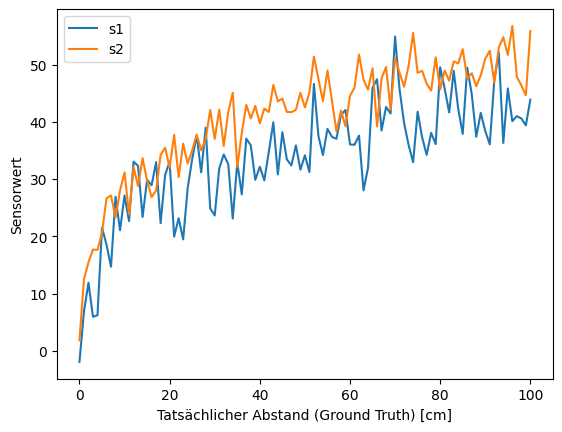

In [80]:
a,s1 = a1.kennlinie()
a,s2 = a2.kennlinie()
plt.plot(a,s1, label="s1")
plt.plot(a,s2, label="s2")
plt.xlabel("Tatsächlicher Abstand (Ground Truth) [cm]")
plt.ylabel("Sensorwert")
plt.legend()
plt.show()

# Inverses Sensormodell

In [39]:
ism_a1 = {}

for abstand in range(0,101):

    sensorwerte = []
    for messung in range(0,50):
        sensorwerte.append( a1.sample(abstand) )

    mittlerer_sensorwert = numpy.mean( sensorwerte )
    ism_a1[mittlerer_sensorwert] = abstand
    #ism_a1[abstand] = mittlerer_sensorwert

In [47]:
def sensorwert_zu_abstand(sensorwert):

    min_dist = None
    best_key = None
    for key in ism_a1:
        dist = abs(sensorwert-key)
        if best_key == None or dist<min_dist:
            best_key = key
            min_dist = dist

    beste_entfernungs_schaetzung = ism_a1[best_key]
    return beste_entfernungs_schaetzung
        

In [52]:
numpy.argmin(abs(numpy.array(list(ism_a1.keys())) - 16.5))

6

In [72]:
sensorwert_zu_abstand(33)

32

In [73]:
index = numpy.argmin( abs(numpy.array( list(ism_a1.keys()) ) - 33) )
key = list(ism_a1.keys())[index]
ism_a1[key]

32

# Noch ein weiterer simulierter Sensor mit Mehrdeutigkeiten

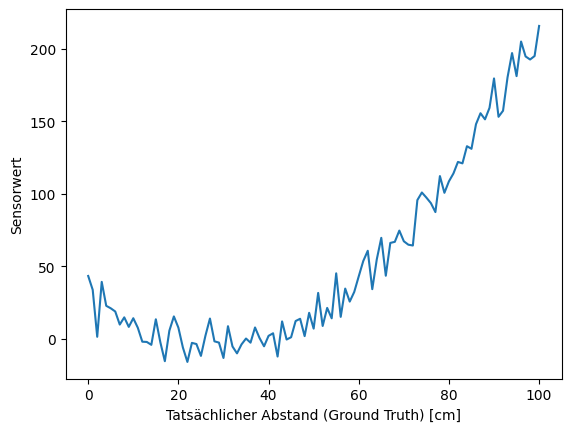

In [100]:
import numpy
import matplotlib.pyplot as plt

class absstandssensor_mehrdeutig:

    def __init__(self):
        self.bias = numpy.random.uniform(low=-10, high=+10)
        self.noise = numpy.random.uniform(low=1, high=5)
        self.pos = numpy.random.uniform(low=1, high=100)

    def sample(self, abstand):
        sensorwert = abstand + \
                     5*numpy.sin(abstand/10) + \
                     4*numpy.random.normal(loc=self.bias, scale=self.noise) + \
                     ((abstand-self.pos)/5)**2
        return sensorwert

    def kennlinie(self):
        abstaende   = []
        sensorwerte = []
        for abstand in range(0,101):
            sensorwert = self.sample( abstand )
            abstaende.append( abstand )
            sensorwerte.append( sensorwert )

        return numpy.array( abstaende ), numpy.array( sensorwerte )

    def zeige_kennlinie(self):
        a,s = self.kennlinie()
        plt.plot(a,s)
        plt.xlabel("Tatsächlicher Abstand (Ground Truth) [cm]")
        plt.ylabel("Sensorwert")
        plt.show()

    def __str__(self):
        return f"Bias: {self.bias:.2f}\nNoise: {self.noise:.2f}"
    


a1 = absstandssensor_mehrdeutig()
a1.zeige_kennlinie()